In [1]:
# knn 探究
# 从单模板匹配（最近邻）到 k近邻
# 如何选取合适的距离函数
# knn算法的本质，为什么说样本趋于无穷大的时候knn区域贝叶斯决策
# 如何衡量一个分类器的性能和准确度
# 参考 https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn/notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import data_util # 自己写的加载数据集函数

train_x, train_y, test_x, test_y = data_util.load_data()
print(train_x.shape)

(60000, 784)


In [2]:
# 上述结果表示加载成功
# 使用jupyter book 的原因就是更方便的演示效果，同时记录自己的学习过程

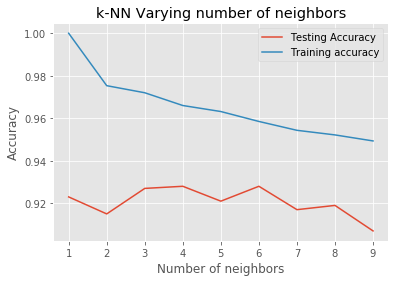

In [3]:
# 需要合理的划分测试集选取k值 10%
train_x = train_x[:6000]
train_y = train_y[:6000]
test_x = test_x[:1000]
test_y = test_y[:1000]
# 首先模仿kaggle中的过程，选取数据中的10%，通过测试准确度和训练的准确度查看最优的k值
# knn中的k值是超参数，有很多方法来查找这个参数
para = np.arange(1,10)
train_acc = np.empty(len(para))
test_acc = np.empty(len(para))

for i,k in enumerate(para):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x,train_y)
    train_acc[i] = knn.score(train_x,train_y)
    test_acc[i] = knn.score(test_x,test_y)

plt.style.use('ggplot')
plt.title('k-NN Varying number of neighbors')
plt.plot(para, test_acc, label='Testing Accuracy')
plt.plot(para, train_acc, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [4]:
# 选取k = 6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(train_x,train_y)
y_pre = knn.predict(test_x)
# pandas中的crosstab也可达到相同的效果，主要是反映样本的 敏感性（Sensitivity 真阳性率）和特异性（Specificity 假阳性率）
pd.crosstab(test_y, y_pre, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,85,0,0,0,0,0,0,0,0,0,85
1,0,126,0,0,0,0,0,0,0,0,126
2,2,4,104,0,0,0,2,4,0,0,116
3,0,3,1,99,0,0,1,2,0,1,107
4,0,2,0,0,98,0,1,1,0,8,110
5,3,1,0,2,0,75,2,0,1,3,87
6,2,0,0,0,1,0,84,0,0,0,87
7,0,3,1,0,1,0,0,92,0,2,99
8,3,2,1,1,1,2,1,0,76,2,89


In [5]:
# 选取混淆矩阵，来衡量分类器的效果
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_y,y_pre))

[[ 85   0   0   0   0   0   0   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  2   4 104   0   0   0   2   4   0   0]
 [  0   3   1  99   0   0   1   2   0   1]
 [  0   2   0   0  98   0   1   1   0   8]
 [  3   1   0   2   0  75   2   0   1   3]
 [  2   0   0   0   1   0  84   0   0   0]
 [  0   3   1   0   1   0   0  92   0   2]
 [  3   2   1   1   1   2   1   0  76   2]
 [  0   0   0   0   0   0   0   1   4  89]]


In [6]:
print(classification_report(test_y,y_pre))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        85
           1       0.89      1.00      0.94       126
           2       0.97      0.90      0.93       116
           3       0.97      0.93      0.95       107
           4       0.97      0.89      0.93       110
           5       0.97      0.86      0.91        87
           6       0.92      0.97      0.94        87
           7       0.92      0.93      0.92        99
           8       0.94      0.85      0.89        89
           9       0.85      0.95      0.89        94

   micro avg       0.93      0.93      0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [8]:
# 对上述结果做一个说明，precision 说明的是查准率，recall 是查全率，f1 是将二者综合的结果
# 查准率：结果中返回预测为a类中真实为a的概率
# 查全率：对于真实为a类的样本被归类为a的概率
# f1: 将上述两者调和后的结果

In [13]:
# 如何找到最优的k
# 测试结果觉得GridSearchCV的结果不是非常稳定，可以自己使用sklearn 中的cross_validation 训练
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,15)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=2)
knn_cv.fit(train_x,train_y)
print(knn_cv.best_params_,knn_cv.best_score_)

{'n_neighbors': 4} 0.9258333333333333
